In [26]:
import pandas as pd

In [21]:
df = pd.read_csv(r"D:\Downloads\Projects-20240722T093004Z-001\Projects\vehicle_price_prediction\Vehicle Price Prediction\dataset.csv")

In [22]:
print(df.head()) 

                              name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

   year    price                                             engine  \
0  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  2024  50170.0                                                OHV   
2  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  2023  468

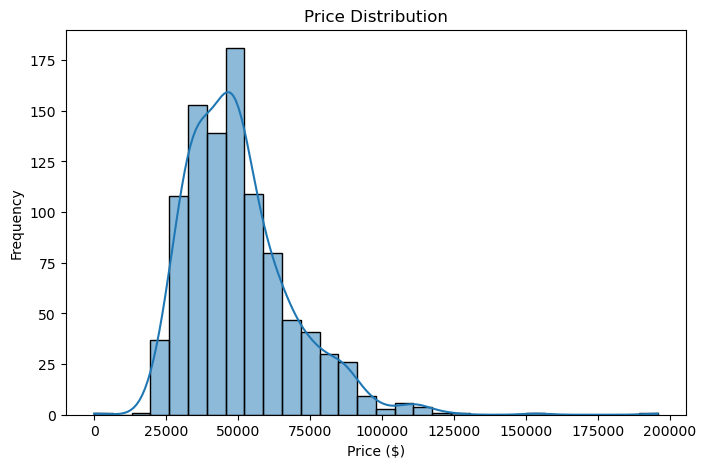

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True)
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.show()

✅ Preprocessing complete.
Training samples: 783 | Test samples: 196


In [28]:
corr_matrix = df[['price', 'mileage', 'cylinders', 'engine_displacement', 'age']].corr()
print(corr_matrix['price'].sort_values(ascending=False))


price                  1.000000
cylinders              0.360868
engine_displacement    0.189183
mileage                0.077728
age                   -0.011979
Name: price, dtype: float64


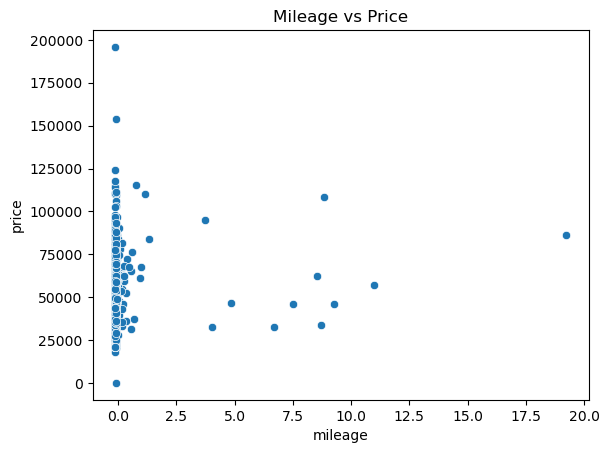

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df['mileage'], y=df['price'])
plt.title('Mileage vs Price')
plt.show()


Any NaNs in X_train? True
Any NaNs in y_train? False
Any infinite values in X_train? False
Any infinite values in y_train? False


In [32]:
# 1-11: Data preprocessing steps (same as yours) ...

# 12. Split data into features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# 13. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fill NaNs in numeric columns with median (train median used)
for col in numeric_features:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)
    X_test[col].fillna(median_val, inplace=True)

# Fill any other NaNs with zero
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


# Remove problematic characters from column names
X_train.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_train.columns]
X_test.columns = [col.replace('[', '').replace(']', '').replace('<', '') for col in X_test.columns]

print("✅ Preprocessing complete.")
print(f"Training samples: {X_train.shape[0]} | Test samples: {X_test.shape[0]}")

# 14. Initialize and fit model
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 15. Predict and evaluate
y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🚗 XGBoost Regression Performance:")
print(f"MAE:  ${mae:,.2f}")
print(f"RMSE: ${rmse:,.2f}")
print(f"R² Score: {r2:.4f}")


✅ Preprocessing complete.
Training samples: 783 | Test samples: 196
🚗 XGBoost Regression Performance:
MAE:  $4,779.33
RMSE: $6,955.56
R² Score: 0.8416


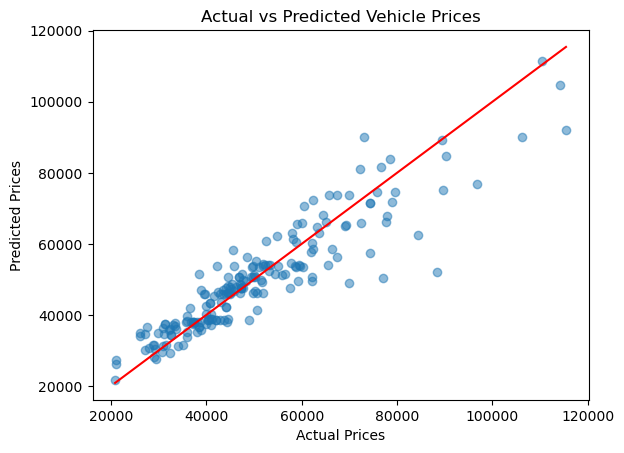

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Vehicle Prices')
plt.show()
